# RFM Customer Segmentation

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Dataset Source : http://archive.ics.uci.edu/dataset/352/online+retail 

<b> Feature Information </b>

<table id="table" style="border-color: #827d7d;" border="2" cellspacing="2" cellpadding="2">
<tbody>

<tr>
<td style="border-color: #827d7d; width: 12%; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Column</span></strong></td>
<td style="border-color: #827d7d; width: 12%; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Name</span></strong></td>
<td style="border-color: #827d7d; width: 10%; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Category</span></strong></td>
<td style="border-color: #827d7d; width: 45%;  background-color: #11a4e7;"><strong><span style="color: #ffffff;">Description</span></strong></td>
</tr>
    
<tr>
<td>InvoiceNo </td>
<td>Invoice number</td>
<td><span style="font-weight: 400;">Nominal</span></td>
<td><span style="font-weight: 400;">a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation. 
</span></td>
</tr>

<tr>
<td>StockCode</td>
<td>Product (item) code </td>
<td><span style="font-weight: 400;">Nominal</span></td>
<td><span style="font-weight: 400;">a 5-digit integral number uniquely assigned to each distinct product</span></td>
</tr>

<tr>
<td>Description</td>
<td>Product (item)</td>
<td>Nominal</td>
<td>Description of the item</td>
</tr>

<tr>
<td>Quantity</td>
<td>quntity purchased</td>
<td><span style="font-weight: 400;">Numeric</span></td>
<td><span style="font-weight: 400;">The quantities of each product (item) per transa</span></td>
</tr>

<tr>
<td>InvoiceDate</td>
<td>Invoice Date and time</td>
<td><span style="font-weight: 400;">Numeric</span></td>
<td><span style="font-weight: 400;"> the day and time when each transaction was generated</span></td>
</tr>

<tr>
<td>UnitPrice</td>
<td>UnitPrice</td>
<td><span style="font-weight: 400;">Numeric</span></td>
<td><span style="font-weight: 400;">Product price per unit in sterling</span></td>
</tr>
    
<tr>
<td>CustomerID</td>
<td>Customer number</td>
<td><span style="font-weight: 400;">Nominal</span></td>
<td><span style="font-weight: 400;"> 5-digit integral number uniquely assigned to each customer.</span></td>
</tr>
    
<tr>
<td>Country</td>
<td>country</td>
<td><span style="font-weight: 400;">Nominal</span></td>
<td><span style="font-weight: 400;"> the name of the country where each customer
resides</span></td>
</tr>

</tbody>
</table>

Use RFM Analysis, a customer segmentation technique based on past purchasing behavior, to develop targeted approaches for better customer understanding, trend observation, and increased retention and sales. Calculate Recency, Frequency, and Monetary values for UK transactions to create an RFM table.

<b> Importing the neccessary libaries </b>

In [1]:
#importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import sklearn.cluster as cluster
import sklearn.cluster as KMeans
import sklearn.preprocessing as StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import zipfile

import warnings
warnings.filterwarnings('ignore')

<b> Importing the dataset from zip file </b>

In [2]:
#Create a dataframe with name 'df'
df = []

# Path of the zip file
path = "D:\projects for git\Projects for Resume\RFM Customer Segementation\online+retail.zip"

# Specify the paths to your ZIP file
with zipfile.ZipFile(path, 'r') as archive:
    
    # Name of the excel file
    file_name = 'Online Retail.xlsx'
    
    with archive.open(file_name) as file:
        # Read each excel file into a DataFrame
        df = pd.read_excel(file)

In [3]:
# Printing the first 10 rows
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Data Cleaning

In [4]:
#Checking the dimenstions of the dataset
df.shape

(541909, 8)

In [5]:
#summary of the dataframe's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#descriptive statistics of quantitative variables
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#descriptive statistics of object variables
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [8]:
#descriptive statistics of all variables
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [9]:
# Count columns with name "InvoiceNo" starting with letter "c"
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df_invoiceCancel = df[df['InvoiceNo'].str.contains('C')]
df_invoiceCancel.head()
print("Number of columns with name 'InvoiceNo' starting with 'C':", df_invoiceCancel.shape[0])

Number of columns with name 'InvoiceNo' starting with 'C': 9288


In [10]:
# the number of transaction with negative quantity
df_negativeTransaction=df['Quantity'] <= 0
count_negativeT_no = sum(df_negativeTransaction)
print("Number of transaction with negative quantity: ", count_negativeT_no)

Number of transaction with negative quantity:  10624


Some transactions with negative amount do not belong to canceled ones.

In [11]:
#the number of missing customer Id
sum(pd.isnull(df['CustomerID']))

135080

In [12]:
#Rows with missing customer ID need to be deleted
df.dropna(subset=['CustomerID'],inplace=True)
print(sum(df['CustomerID'].isnull()))
#check the new dataset
df.shape

0


(406829, 8)

In [13]:
#duplicate entries need to be deleted to avoid any bias
num_duplicates = df.duplicated().sum()
print(num_duplicates)
df.drop_duplicates(inplace=True)
#check the new dataset
df.shape


5225


(401604, 8)

In [14]:
# The number of cancellations by each customer.
CancelbyCustomer = df_invoiceCancel.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
CancelbyCustomer.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
CancelbyCustomer.head(10)

,CustomerID,Cancellations
736,14911.0,226
1485,17841.0,136
1397,17511.0,113
848,15311.0,112
89,12607.0,101
605,14410.0,93
417,13798.0,90
652,14606.0,82
246,13113.0,79
36,12471.0,71


## Feature Engineering 

In [15]:
#Dividing the data column into multiple columns 

df['year']=df['InvoiceDate'].apply(lambda x : x.year)
df['month']=df['InvoiceDate'].apply(lambda x : x.month_name())
df['day']=df['InvoiceDate'].apply(lambda x : x.day_name())
df['hour']=df['InvoiceDate'].apply(lambda x : x.hour)

In [16]:
# Adding the time segment based on the purchase time

df['TimeSegment'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
df["hour"]<12, 'Morning','Afternoon'),'Evening')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TimeSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning


In [17]:
# Calculating the revenue by multiplying the qunatity and unitprice
df['Revenue']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TimeSegment,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,20.34


In [18]:
#Checking the canceled orders
dfCancelOrders=df[df['InvoiceNo'].str.contains('C')]
dfCancelOrders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TimeSegment,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,Morning,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,Morning,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,Morning,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,Morning,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,Morning,-6.96


In [19]:
#Rows containing order cancellations need to be deleted so as not to adversely affect our results
df=df[~df['InvoiceNo'].str.contains('C')]
print(f'Dimensions of cleaned data to get results {df.shape}')

Dimensions of cleaned data to get results (392732, 14)


In [20]:
df[df['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TimeSegment,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,January,Tuesday,10,Morning,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011,November,Friday,15,Afternoon,0.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,December,Friday,9,Morning,168469.6


In [21]:
#quantity > 500 need to be deleted
df=df[df['Quantity'] <= 5000]
print(f'Dimensions of cleaned data to get results {df.shape}')

Dimensions of cleaned data to get results (392729, 14)


## Exploratory Data Analysis

<b> Explore the Customers </b>

In [22]:
#the unique number of InvoiceNo per customer to calculate the number of purchases per customer
InvoiceNobyCustomer = pd.DataFrame(df.groupby(['CustomerID'])['InvoiceNo'].count()
                                  ).reset_index().sort_values('InvoiceNo',ascending=False)[0:20]
InvoiceNobyCustomer.head(10)

,CustomerID,InvoiceNo
4009,17841.0,7676
1878,14911.0,5672
1288,14096.0,5111
325,12748.0,4413
1660,14606.0,2677
2175,15311.0,2366
1688,14646.0,2080
561,13089.0,1814
689,13263.0,1667
1433,14298.0,1637


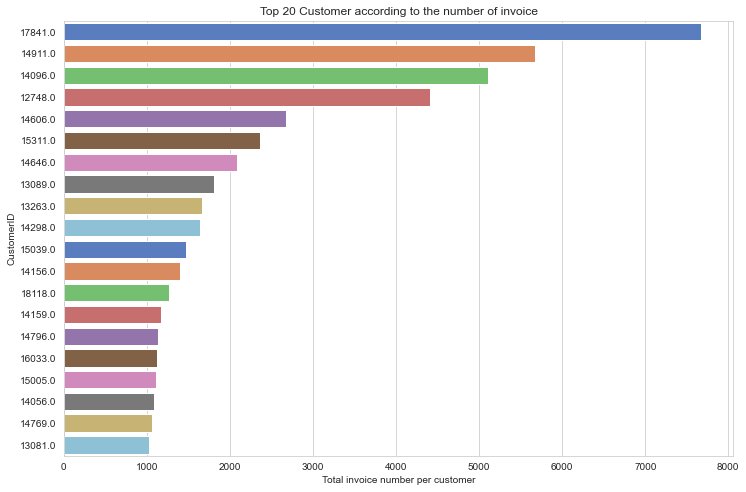

In [23]:
#plot top 20 Customer according to the number of invoice
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Top 20 Customer according to the number of invoice')
sns.barplot(y='CustomerID',x='InvoiceNo', 
            data=InvoiceNobyCustomer, palette='muted', 
            orient='h', order=InvoiceNobyCustomer['CustomerID']).set(
    xlabel='Total invoice number per customer')
plt.show()

<b> Explore the Transcations </b>

In [24]:
#number of quantities per transaction
QuantitiesperOrder = pd.DataFrame(df.groupby(['InvoiceNo'])['Quantity'].sum()).reset_index().sort_values(
    'Quantity',ascending=False)[0:20]
QuantitiesperOrder.head(10)


,InvoiceNo,Quantity
8111,556917,15049
10611,563076,14730
14370,572035,13392
12418,567423,12572
6436,552883,12266
10842,563614,12196
10343,562439,11848
4540,548011,11116
3493,545475,10272
7883,556267,9811


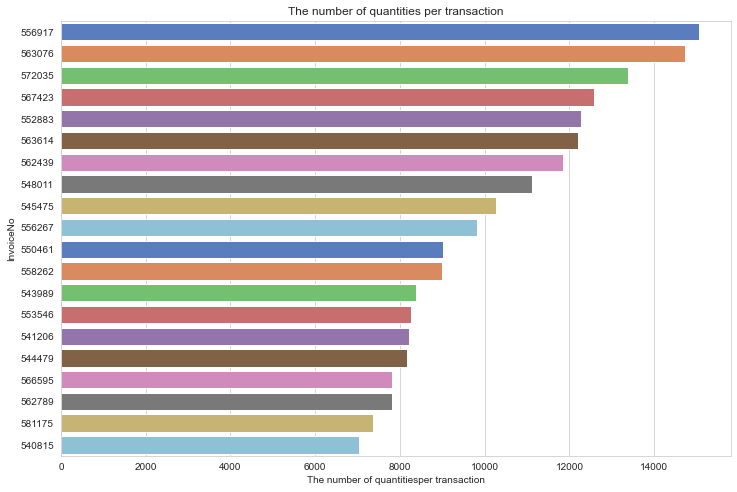

In [25]:
#plot the number of quantities per transaction
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The number of quantities per transaction')
sns.barplot(y='InvoiceNo',x='Quantity',data=QuantitiesperOrder, 
            palette='muted', orient='h',
            order=QuantitiesperOrder['InvoiceNo']).set(xlabel='The number of quantitiesper transaction')
plt.show()

<b> Explore the Invoice no </b>

In [26]:
#the number of items per purchase (InvoiceNo)
kindofitemsforOrder = pd.DataFrame(df.groupby(['InvoiceNo']
                                             )['StockCode'].count()).reset_index().sort_values(
    'StockCode',ascending=False)[0:20]
kindofitemsforOrder.head(10)

,InvoiceNo,StockCode
16241,576339,542
17522,579196,533
18163,580727,529
17127,578270,442
15080,573576,435
12513,567656,421
12325,567183,392
15895,575607,377
14159,571441,364
13763,570488,353


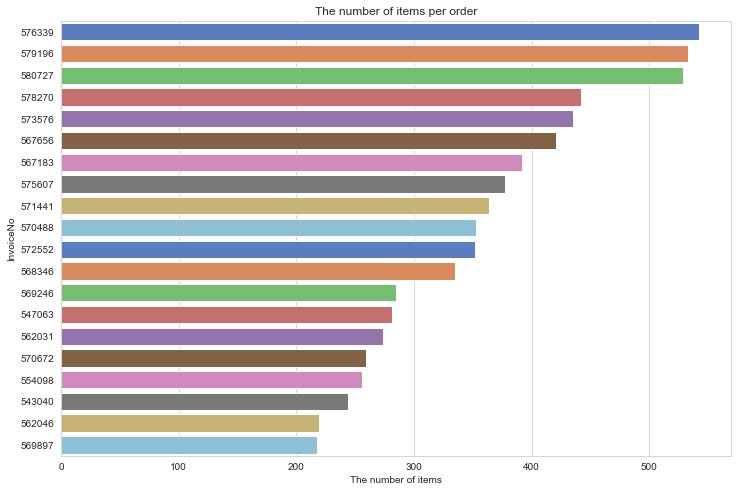

In [27]:
#the number of items per purchase
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The number of items per order')
sns.barplot(y='InvoiceNo',x='StockCode',data=kindofitemsforOrder, 
            palette='muted', orient='h',order=kindofitemsforOrder['InvoiceNo']).set(xlabel='The number of items')
plt.show()

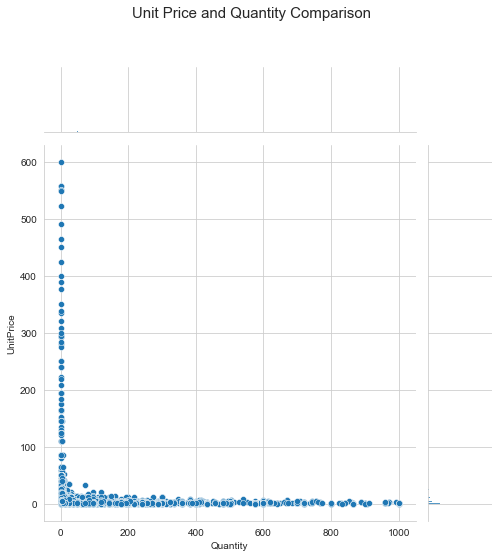

In [28]:
#plotting the quantity vs unitprice
Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = df[(df['UnitPrice'] >0) & (
    df['Quantity']<= 1000) & (df['UnitPrice'] < 600 )], height = 7)
Corr.fig.suptitle("Unit Price and Quantity Comparison", fontsize = 15, y = 1.1)
plt.show()

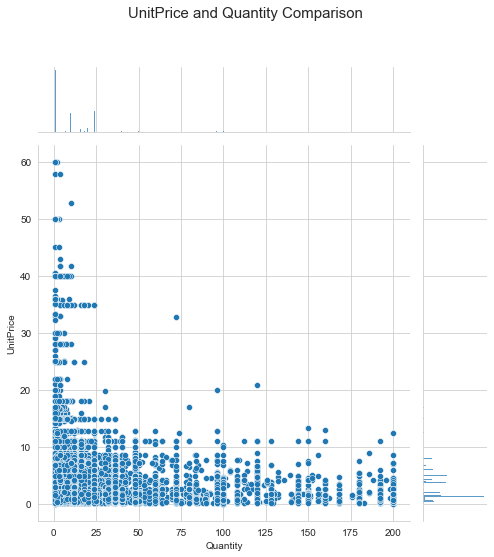

In [29]:
#plotting the quantity vs unit price to look closer
Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = df[(df['UnitPrice'] >0) & (df['Quantity']<= 200) & (df['UnitPrice'] < 60 )], height = 7)
Corr.fig.suptitle("UnitPrice and Quantity Comparison", fontsize = 15, y = 1.1)
plt.show()

<b> Explore the description </b>

In [30]:
#total number per description
totalnumberofDescription = pd.DataFrame(df.groupby(['Description'])
                                        ['Quantity'].sum()).reset_index().sort_values('Quantity',ascending=False)[0:20]
totalnumberofDescription.head(10)

,Description,Quantity
3785,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3697,WHITE HANGING HEART T-LIGHT HOLDER,36706
216,ASSORTED COLOUR BIRD ORNAMENT,35263
2269,PACK OF 72 RETROSPOT CAKE CASES,33670
2599,POPCORN HOLDER,30919
2655,RABBIT NIGHT LIGHT,27153
2047,MINI PAINT SET VINTAGE,26076
2235,PACK OF 12 LONDON TISSUES,25329
2267,PACK OF 60 PINK PAISLEY CAKE CASES,24230


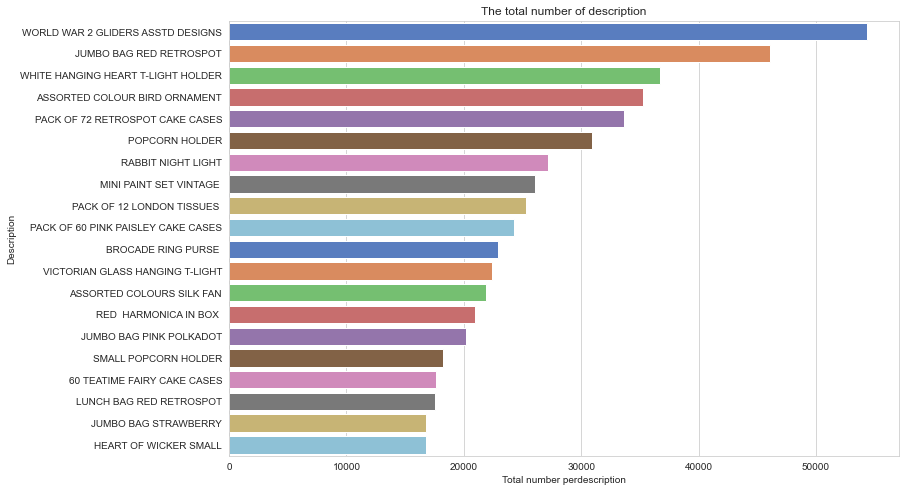

In [31]:
#plot total number per description
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total number of description')
sns.barplot(y='Description',x='Quantity',data=totalnumberofDescription, 
            palette='muted', orient='h',order=totalnumberofDescription['Description']).set(
    xlabel='Total number perdescription')
plt.show()

In [32]:
#total amount of revenue per description
totalamountperDescription = pd.DataFrame(df.groupby(['Description'])['Revenue'].sum()).reset_index().sort_values(
    'Revenue',ascending=False)[0:20]
totalamountperDescription.head(10)

,Description,Revenue
2766,REGENCY CAKESTAND 3 TIER,142264.75
3697,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
2610,POSTAGE,77803.96
2344,PARTY BUNTING,68785.23
216,ASSORTED COLOUR BIRD ORNAMENT,56413.03
2130,Manual,53419.93
2655,RABBIT NIGHT LIGHT,51251.24
722,CHILLI LIGHTS,46265.11
2313,PAPER CHAIN KIT 50'S CHRISTMAS,42584.13


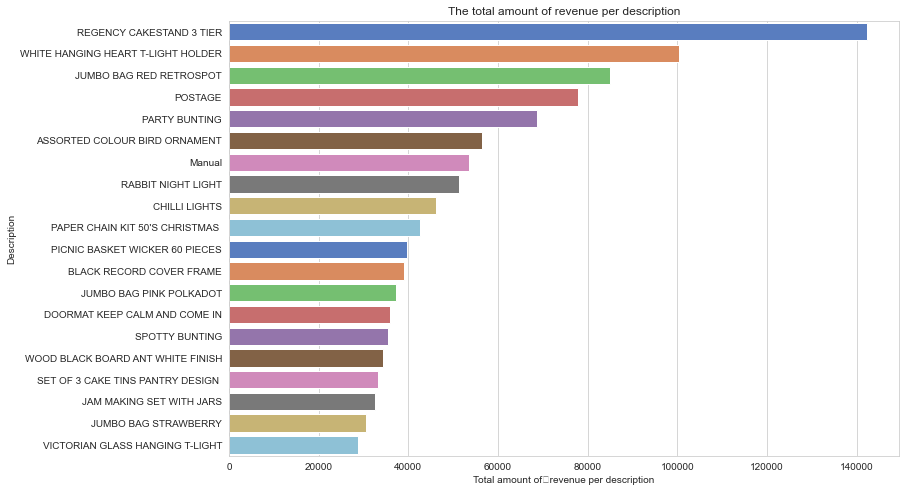

In [33]:
#plot total amount of revenue per description
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total amount of revenue per description')
sns.barplot(y='Description',x='Revenue',data=totalamountperDescription, 
            palette='muted', orient='h',order=totalamountperDescription['Description']).set(
    xlabel='Total amount of␣revenue per description')
plt.show()

<b>Explore the time</b>


In [34]:
#total amount of revenue per month
totalamountperMonth = pd.DataFrame(df.groupby(['month'])['Revenue'].sum()).reset_index().sort_values('Revenue',ascending=False)[0:20]
totalamountperMonth.head(10)

,month,Revenue
9,November,1156205.610
10,October,1035642.450
11,September,950690.202
2,December,919143.570
8,May,677355.150
6,June,660046.050
1,August,644051.040
5,July,598962.901
7,March,594081.760
4,January,490917.710


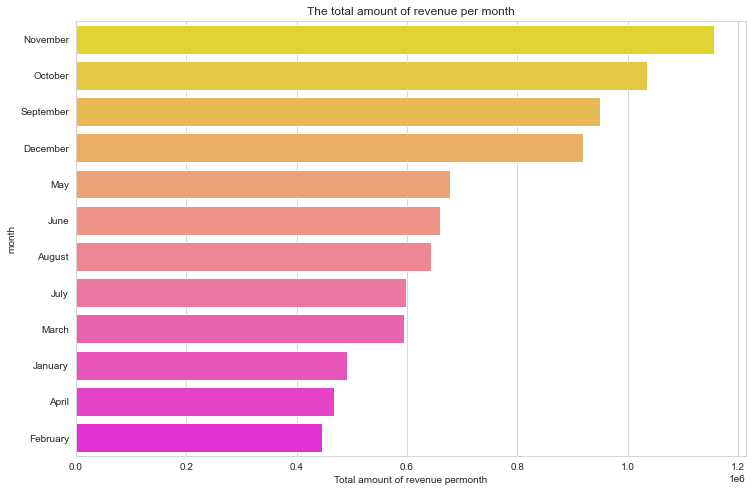

In [35]:
#plot total amount of revenue per month
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total amount of revenue per month')
sns.barplot(y='month',x='Revenue',data=totalamountperMonth, 
            palette='spring_r', orient='h', order=totalamountperMonth['month']).set(xlabel='Total amount of revenue permonth')
plt.show()

<b> Inference </b> : 

The important point is that all transactions that took place between 01/12/2010
(dd/mm/yy) and 09/12/2011. November is in the top rank in terms of total revenue, followed by October.

In [36]:
#total number of quantity per time segment
totalQuantityperTimeSegment = pd.DataFrame(df.groupby(['TimeSegment'])
                                           ['Quantity'].sum()).reset_index().sort_values('Quantity',ascending=False)[0:20]
totalQuantityperTimeSegment.head(10)


,TimeSegment,Quantity
0,Afternoon,2980610
2,Morning,1920613
1,Evening,96913


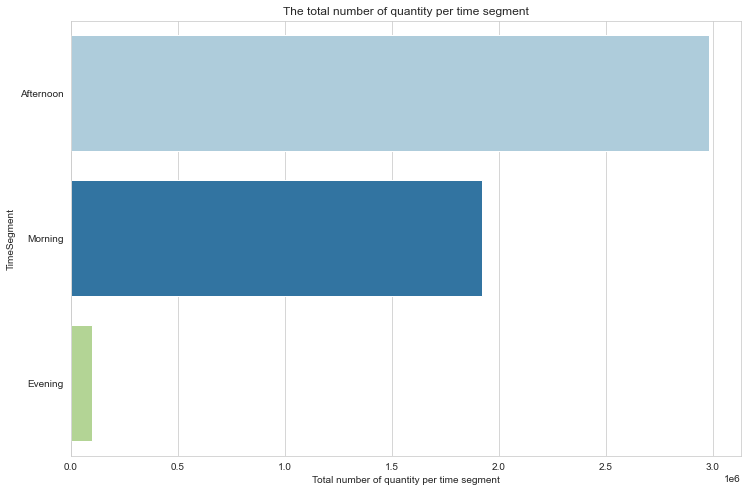

In [37]:
#plot total number of quantity per time segment
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total number of quantity per time segment')
sns.barplot(y='TimeSegment',x='Quantity',data=totalQuantityperTimeSegment, 
            palette='Paired', orient='h',order=totalQuantityperTimeSegment['TimeSegment']).set(
    xlabel='Total number of quantity per time segment')
plt.show()

In [38]:
#total number of quantity per day
totalQuantityperDay = pd.DataFrame(df.groupby(['day'])
                                   ['Quantity'].sum()).reset_index().sort_values('Quantity',ascending=False)[0:20]
totalQuantityperDay.head(10)


,day,Quantity
3,Thursday,1150224
5,Wednesday,960128
4,Tuesday,931557
1,Monday,766919
0,Friday,728324
2,Sunday,460984


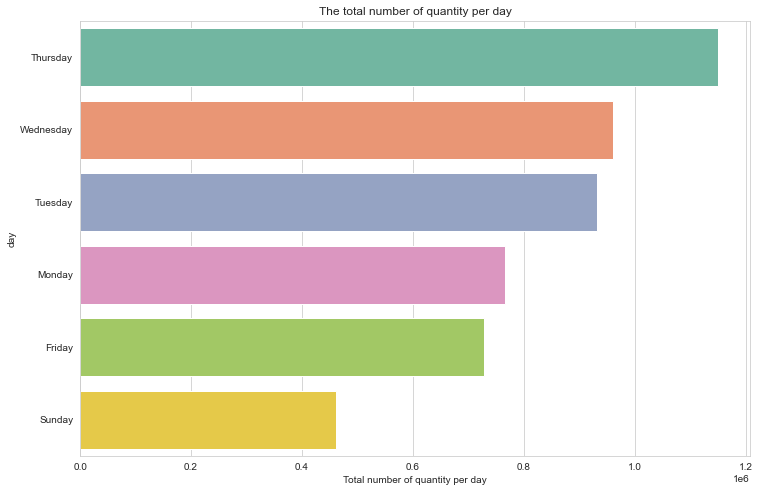

In [39]:
#plot total number of quantity per day
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total number of quantity per day')
sns.barplot(y='day',x='Quantity',data=totalQuantityperDay, 
            palette='Set2', orient='h', order=totalQuantityperDay['day']).set(
    xlabel='Total number of quantity per day')
plt.show()

<b> Explore the Country </b>

In [40]:
#total number of quantity per country
totalQuantityperCountry = pd.DataFrame(df.groupby(['Country'])
                                       ['Quantity'].sum()).reset_index().sort_values('Quantity',ascending=False)[0:20]
totalQuantityperCountry.head(10)

,Country,Quantity
35,United Kingdom,4086287
23,Netherlands,200937
10,EIRE,140383
14,Germany,119156
13,France,111429
0,Australia,84199
31,Sweden,36078
32,Switzerland,30083
30,Spain,27944
19,Japan,26016


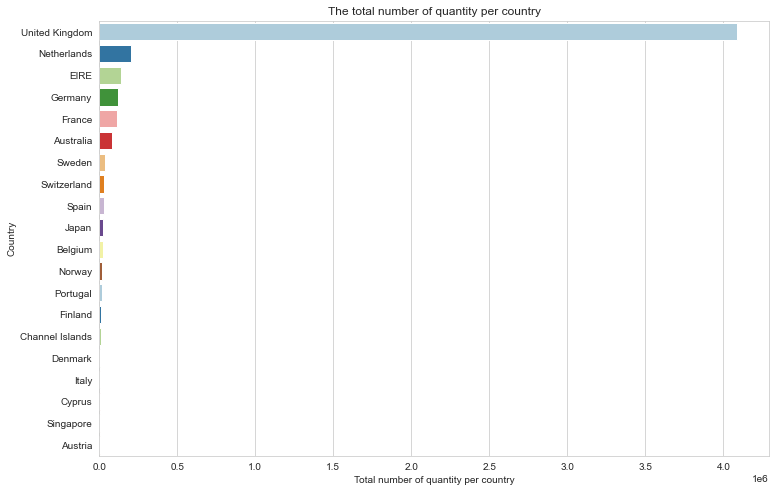

In [41]:
#plot total number of quantity per country
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('The total number of quantity per country')
sns.barplot(y='Country',x='Quantity',data=totalQuantityperCountry, 
            palette='Paired', orient='h', order=totalQuantityperCountry['Country']).set(
    xlabel='Total number of quantity per country')
plt.show()

<b> Explore Cancel Orders </b>

In [42]:
#the unique number of InvoiceNo per customer
CancelInvoiceNobyCustomer = pd.DataFrame(dfCancelOrders.groupby(['CustomerID','Country'])
                                         ['InvoiceNo'].count()).reset_index().sort_values('InvoiceNo',ascending=False)[0:20]
CancelInvoiceNobyCustomer.head(10)

,CustomerID,Country,InvoiceNo
737,14911.0,EIRE,226
1486,17841.0,United Kingdom,136
1398,17511.0,United Kingdom,113
849,15311.0,United Kingdom,112
90,12607.0,USA,101
606,14410.0,United Kingdom,92
418,13798.0,United Kingdom,89
653,14606.0,United Kingdom,82
247,13113.0,United Kingdom,79
37,12471.0,Germany,71


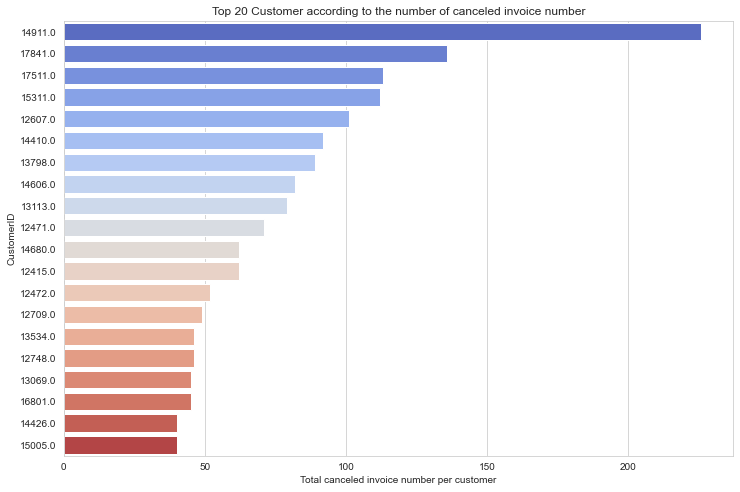

In [43]:
#plot top 20 Customer according to the number of canceled invoice number
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Top 20 Customer according to the number of canceled invoice number')
sns.barplot(y='CustomerID',x='InvoiceNo',data=CancelInvoiceNobyCustomer, 
            palette='coolwarm', orient='h',order=CancelInvoiceNobyCustomer['CustomerID']).set(
    xlabel='Total canceled invoice number per customer')
plt.show()

In [44]:
#the total amount of revenue per customer
CancelRevenuebyCustomer = pd.DataFrame(dfCancelOrders.groupby(['CustomerID','Country'])
                                       ['Revenue'].sum()).reset_index().sort_values('Revenue',ascending=True)[0:20]
CancelRevenuebyCustomer.head(10)

,CustomerID,Country,Revenue
1137,16446.0,United Kingdom,-168469.60
0,12346.0,United Kingdom,-77183.60
780,15098.0,United Kingdom,-39267.00
1040,16029.0,United Kingdom,-27682.15
966,15749.0,United Kingdom,-22998.40
137,12744.0,Singapore,-12158.90
737,14911.0,EIRE,-11252.44
186,12931.0,United Kingdom,-8593.15
61,12536.0,France,-8495.01
498,14096.0,United Kingdom,-8043.88


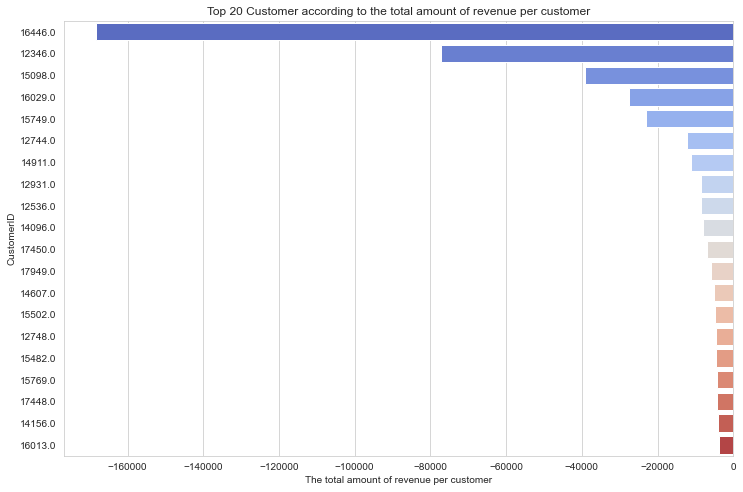

In [45]:
#plot top 20 Customer according to the total amount of revenue per customer
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Top 20 Customer according to the total amount of revenue per customer')
sns.barplot(y='CustomerID',x='Revenue',data=CancelRevenuebyCustomer, 
            palette='coolwarm', orient='h', order=CancelRevenuebyCustomer['CustomerID']).set(
    xlabel='The total amount of revenue per customer')
plt.show()

<b>Observations from above Visualizations </b>

- There is no missing data. 


- Number of observations is 392732 and number of variables is 14. 


- There are 37 different countries in the dataset and 88.9% of them are United Kingdom. 


- According to the month column, the most preferred months for shopping were November (16.1%), followed by October (12.4%) and December (10.9%).


- According to the day column, the most preferred days for shopping were Thursday (20.2%), followed by Wednesday (17.3%) and Tuesday (16.7%). -According to the TimeSegment column; customers tend to shop in the afternoon (68%), then in the morning (30%).


- When we dive into data for quantity: - median is 6 - 95-th percentile is 36 - maximum quantity is 80995 for an order, 2nd max is 74215, 3rd max is 12540 and 4th max is 4800. Therefore, the row has quantity more than 5000 can be deleted to avoid bias.

# RFM Analysis

The <a href='https://www.putler.com/rfm-analysis/'><b>RFM model</b> </a>is a marketing analysis framework used to segment and understand customer
behavior based on three key factors: Recency, Frequency, and Monetary Value. It is commonly
employed by businesses to categorize their customer base into distinct groups, which can then be
used for targeted marketing strategies and personalized communication. 

- Recency – How recently did the customer purchase  
- Frequency – How often do they purchase 
- Monetary – How much do they spend? 

<b>Recency </b>- In order to find the recency value of each customer, we
need to determine the last invoice date as the current date and subtract the last purchasing date
of each customer from this date.

<b>Frequency</b> - In order to find the frequency value of each customer, we need to determine how
many times the customers make purchases.

<b>Monetary</b> - In order to find the monetary value of each customer, we need to determine how much
do the customers spend on purchases. 
    
   By analyzing these three dimensions, businesses can segment
their customer base into various groups. Here’s a general breakdown of how this segmentation might
occur


<img src = 'https://clevertap.com/wp-content/uploads/2018/03/Incontent_image.png'> </img>

<table id="table" style="border-color: #827d7d;" border="2" cellspacing="2" cellpadding="2">
<thead><tr>

<td style="border-color: #827d7d; width: 25%; text-align: right; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Customer Segment</span></strong></td>
<td style="border-color: #827d7d; width: 75%; text-align: center; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Activity</span></strong></td>    
    
</tr></thead>
<tbody>
 
<tr>
<td>High-Value Customers</td>
<td>These are customers who have recently made frequent purchases of
high monetary value. They are often the most valuable segment as they contribute significantly to
the business’s revenue</td>
</tr>

<tr>
<td>Recent Customers</td>
<td>These are customers who have made purchases or engaged with the business
recently. While they might not have a long history with the brand, their recent activity suggests
potential interest </td>
</tr>

<tr>
<td>Loyal Customers</td>
<td>This group comprises customers who make frequent purchases, regardless of
the monetary value. They may not spend as much as high-value customers individually, but their
consistent engagement is valuable </td>
</tr>
    
<tr>
<td>Churned Customers</td>
<td>These are customers who were active in the past but haven’t interacted
with the business recently. Identifying and re-engaging with these customers can help reduce churn </td>
</tr>
    
<tr>
<td>Low-Value Customers</td>
<td>These customers might have made a few low-value purchases, but their
overall impact on the business’s revenue is relatively small </td>
</tr>
    
<tr>
<td>Inactive Customers</td>
<td>This group includes customers who haven’t engaged with the business for
a significant period. These customers might require special re-engagement efforts to bring them
back </td>
</tr>
    
  
<tr>
<td>High</td>
<td>These </td>
</tr>
    
</tbody>
</table>

The RFM model can provide businesses with insights into customer behavior, allowing them to
tailor marketing campaigns, offers, and communication strategies to each segment’s unique characteristics. It’s important to note that while the RFM model is a useful tool, its effectiveness can
be enhanced when combined with additional data and more advanced analytics techniques

In [46]:
import datetime as dt
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [47]:
presence=dt.datetime(2011,12,10)
#Create RFM scores for each customer
#Recency = Presence - Last Invoice Data
#Frequency = Total Number of Transactions
#Monetary = Total money spent
df_rfm=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence-x.max()).days,
                                     'InvoiceNo': lambda x: len(x),
                                     'Revenue': lambda x: x.sum()})

#Convert Invoice Date into type int
df_rfm['InvoiceDate']= df_rfm['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
df_rfm.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo':'Frequency',
                       'Revenue': 'Monetary'}, inplace=True)
df_rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40
12356.0,22,59,2811.43


In [48]:
#descriptive statistics of all variables
df_rfm.describe(include='all')

,Recency,Frequency,Monetary
count,4337.000000,4337.000000,4337.000000
mean,92.053032,90.553147,1992.519182
std,99.966159,225.559226,8547.583474
min,0.000000,1.000000,2.900000
25%,17.000000,17.000000,306.450000
50%,50.000000,41.000000,668.430000
75%,142.000000,98.000000,1657.280000
max,373.000000,7676.000000,280206.020000


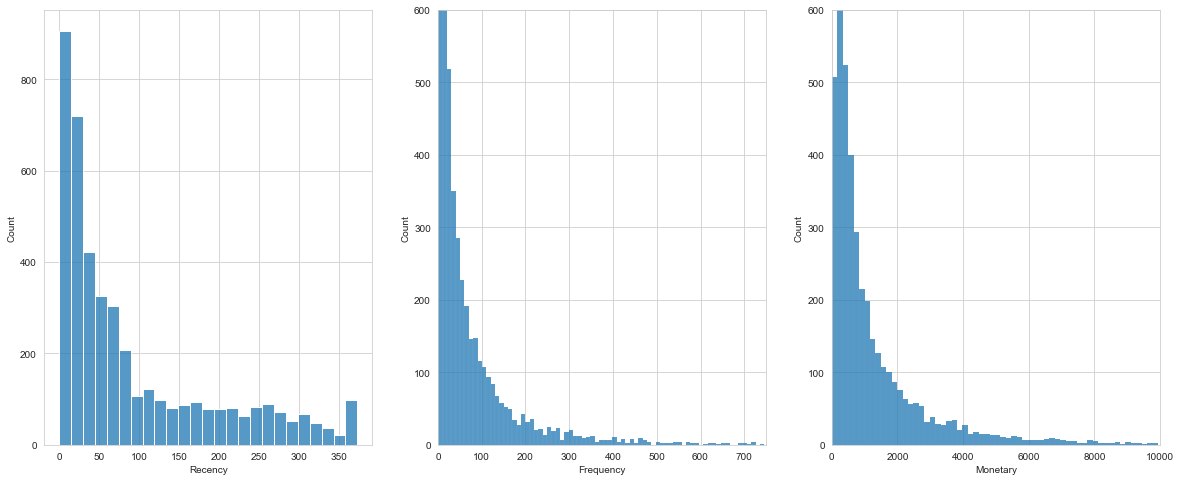

In [49]:
#plot the data distribution
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

sns.histplot(df_rfm['Recency'], ax=axis[0])

sns.histplot(df_rfm['Frequency'], ax=axis[1])
axis[1].set_xlim(0, 750)
axis[1].set_ylim(0,600)

sns.histplot(df_rfm['Monetary'], ax=axis[2])
axis[2].set_xlim(0, 10000)
axis[2].set_ylim(0,600)
plt.show()

# Customer Segmentation with RFM Scores

<b>Customer Segmentation </b> involves categorizing customers based on their specific requirements. Common techniques for such
categorization include evaluating their Recency-Frequency-Monetary (RFM) values, analyzing demographic factors like gender, geographic location, and employing business-derived scoring systems.
For the current case, we will utilize the RFM values

An <a href ='https://clevertap.com/blog/rfm-analysis/'> RFM</a> Table will be constructed to categorize customers
according to the RFM table. For instance, designations like “Big Spenders” will be assigned to the
highest value customers, while those who have disengaged might be labeled as “Lost Customers”.


<b> Calculating RFM Scores </b>

The simplest way to create customer segments from an RFM model is by using <b>Quartiles</b>. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis. 

<a href='https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales'> RFM Table </a> as follows :

<table id="table" style="border-color: #827d7d;" border="2" cellspacing="2" cellpadding="2">
<tbody>
<tr>
<td style="border-color: #827d7d; width: 25%; text-align: center; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Segment</span></strong></td>
<td style="border-color: #827d7d; width: 10%; text-align: center; background-color: #11a4e7;"><strong><span style="color: #ffffff;">RFM</span></strong></td>
<td style="border-color: #827d7d; width: 32%; text-align: center; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Description</span></strong></td>
<td style="border-color: #827d7d; width: 32%; text-align: center; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Marketing</span></strong></td>
</tr>
<tr>
<td>Best Customers</td>
<td>111</td>
<td><span style="font-weight: 400;">Bought most recently and most often, and spend the most</span></td>
<td><span style="font-weight: 400;">No price incentives, new products, and loyalty programs</span></td>
</tr>
<tr>
<td>Loyal Customers</td>
<td>X1X</td>
<td><span style="font-weight: 400;">Buy most frequently</span></td>
<td><span style="font-weight: 400;">Use R and M to further segment</span></td>
</tr>
<tr>
<td>Big Spenders</td>
<td>XX1</td>
<td>Spend the most</td>
<td>Market your most expensive products</td>
</tr>
<tr>
<td>Almost Lost</td>
<td>311</td>
<td><span style="font-weight: 400;">Haven’t purchased for some time, but purchased frequently and spend the most</span></td>
<td><span style="font-weight: 400;">Aggressive price incentives</span></td>
</tr>
<tr>
<td>Lost Customers</td>
<td>411</td>
<td><span style="font-weight: 400;">Haven’t purchased for some time, but purchased frequently and spend the most</span></td>
<td><span style="font-weight: 400;">Aggressive price incentives</span></td>
</tr>
<tr>
<td>Lost Cheap Customers</td>
<td>444</td>
<td><span style="font-weight: 400;">Last purchased long ago, purchased few, and spent little</span></td>
<td><span style="font-weight: 400;">Don’t spend too much trying to re-acquire</span></td>
</tr>
</tbody>
</table>

The <a href="https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales"> auther</a> in the article scores 1 as the highest and 4 as the lowest

In [50]:
#Calculating R_score, F_score and M_score by splitting them by quantiles
df_rfm['R_score']=pd.qcut(df_rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
df_rfm['F_score']=pd.qcut(df_rfm['Frequency'], q=4, labels=[4,3,2,1]).astype(int)
df_rfm['M_score']=pd.qcut(df_rfm['Monetary'], q=4, labels=[4,3,2,1]).astype(int)

#Calculating RFM score for each customer
df_rfm['RFM_Score']=df_rfm['R_score']+df_rfm['F_score']+df_rfm['M_score']

# Finding the rfm group for each customer
df_rfm['RFM'] = 100*df_rfm['R_score'] + 10*df_rfm['F_score'] + df_rfm['M_score']

df_rfm.head(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM
CustomerID,,,,,,,,
12347.0,2,182,4310.00,4,1,1,6,411
12348.0,75,31,1797.24,2,3,1,6,231
12349.0,18,73,1757.55,3,2,1,6,321
12350.0,310,17,334.40,1,4,3,8,143
12352.0,36,85,2506.04,3,2,1,6,321
12353.0,204,4,89.00,1,4,4,9,144
12354.0,232,58,1079.40,1,2,2,5,122
12355.0,214,13,459.40,1,4,3,8,143
12356.0,22,59,2811.43,3,2,1,6,321


In [51]:
#Handling negative and zero values
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#Applying handle_neg_n_zero function to Recency and Monetary columns
df_rfm['Recency'] = [handle_neg_n_zero(x) for x in df_rfm.Recency]
df_rfm['Monetary'] = [handle_neg_n_zero(x) for x in df_rfm.Monetary]

#Performing Log transformation on columns for smoothening the distribution
Log_Tfd_Data = df_rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Log_Tfd_Data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.737,2.833,5.812
12352.0,3.584,4.443,7.826


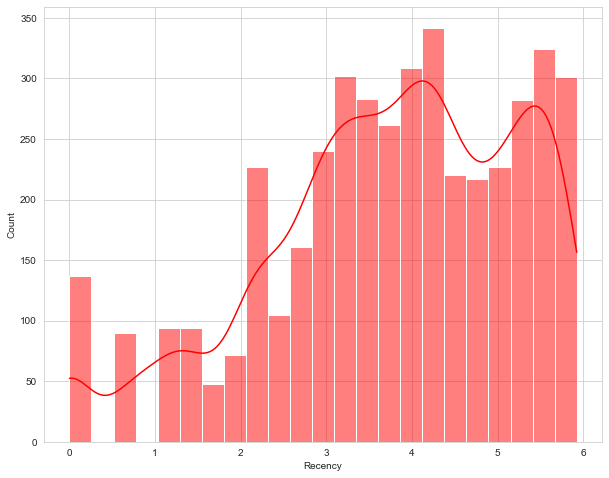

In [52]:
# Data distribution after data normalization for Recency
Plot_R = Log_Tfd_Data['Recency']
plt.figure(figsize=(10, 8))
sns.histplot(data=Plot_R, color='r', kde=True)
plt.show()

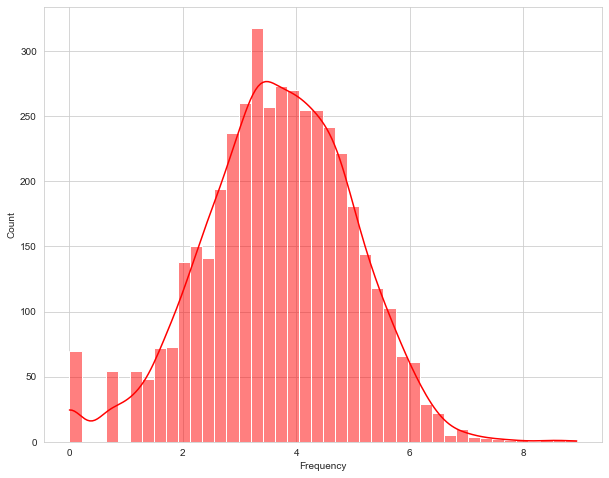

In [53]:
# Data distribution after data normalization for Frequency
Plot_F = Log_Tfd_Data['Frequency']
plt.figure(figsize=(10, 8))
sns.histplot(data=Plot_F, color='r', kde=True)
plt.show()

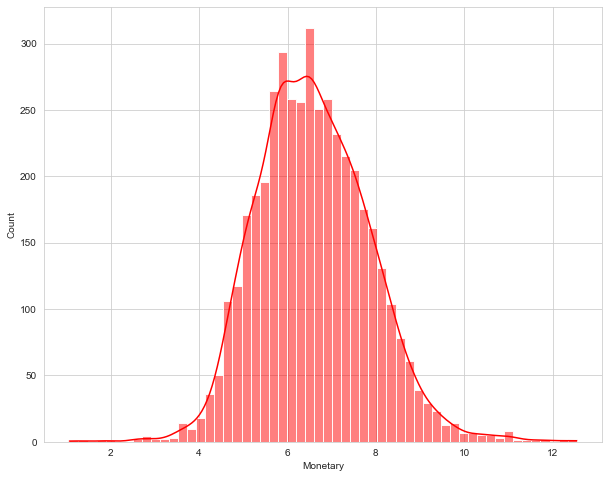

In [54]:
# Data distribution after data normalization for Monetary
Plot_M = Log_Tfd_Data['Monetary']
plt.figure(figsize=(10, 8))
sns.histplot(data=Plot_M, color='r', kde=True)
plt.show()

In [55]:
df_rfm['Log_R']=Log_Tfd_Data['Recency']
df_rfm['Log_F']=Log_Tfd_Data['Frequency']
df_rfm['Log_M']=Log_Tfd_Data['Monetary']
df_rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM,Log_R,Log_F,Log_M
CustomerID,,,,,,,,,,,
12347.0,2,182,4310.00,4,1,1,6,411,0.693,5.204,8.369
12348.0,75,31,1797.24,2,3,1,6,231,4.317,3.434,7.494
12349.0,18,73,1757.55,3,2,1,6,321,2.890,4.290,7.472
12350.0,310,17,334.40,1,4,3,8,143,5.737,2.833,5.812
12352.0,36,85,2506.04,3,2,1,6,321,3.584,4.443,7.826


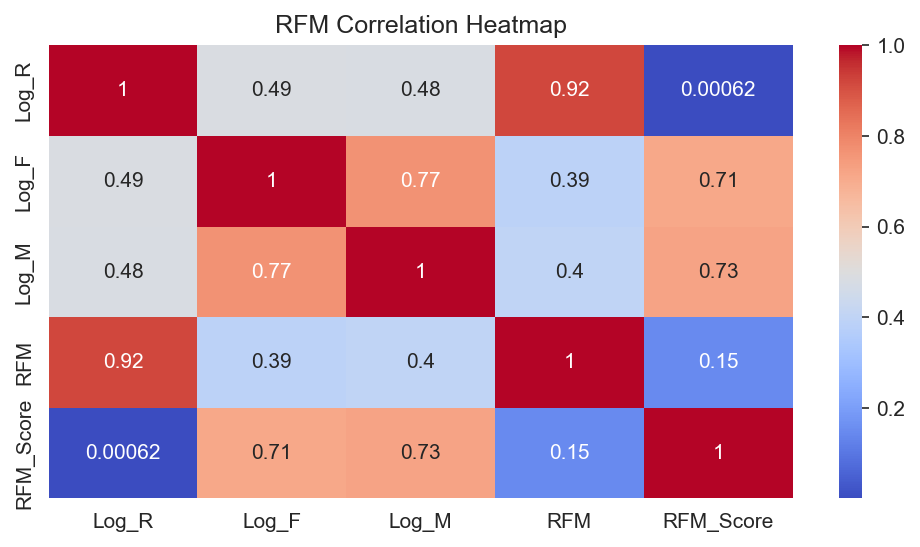

In [56]:
# Visualizing the correlations among features
column = ['Log_R','Log_F','Log_M','RFM','RFM_Score']
plt.figure(figsize=(8,4), dpi=150)
sns.heatmap(abs(df_rfm[column].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

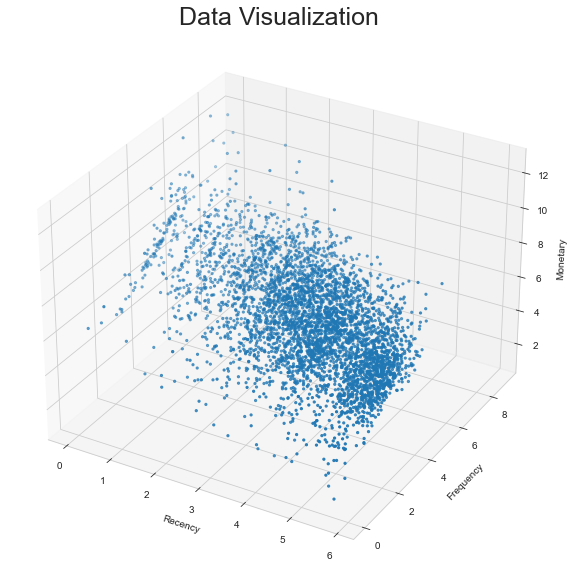

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot data points in 3D space
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = df_rfm['Log_R']
y = df_rfm['Log_F']
z = df_rfm['Log_M']
ax.scatter(x, y, z, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)
plt.show()

# K-Means Clustering

Clustering is an unsupervised machine learning technique used to uncover underlying groups within
data. One common approach for this is the K-means clustering algorithm, which is frequently
employed to identify distinct segments within a customer dataset.

- Our dataset is large so Hierarchical clustering is not well suited for analysis.

During the process of building a KMeans model, it’s essential to specify the number of clusters beforehand. To determine the most appropriate number of clusters, various methods like silhouette analysis and the elbow method can be utilized. These techniques aid in selecting the optimal number of clusters that best represents the inherent structure of the data.


<b> Elbow Method </b> 

One of the most common ways to choose a value for K is known as the elbow method, which involves creating a plot with the number of clusters on the x-axis and the total
within sum of squares on the y-axis and then identifying where an “elbow” or bend appears in the plot.

The point on the x-axis where the “elbow” occurs tells us the optimal number of clusters to use in
the k-means clustering algorithm.

In [58]:
#create a new dataset to cluster customers by recency, frequency and monetary
df_cluster=df_rfm[['Log_R','Log_F','Log_M']]
df_cluster = df_cluster.reset_index(drop=True)
df_cluster.head()

,Log_R,Log_F,Log_M
0,0.693,5.204,8.369
1,4.317,3.434,7.494
2,2.890,4.290,7.472
3,5.737,2.833,5.812
4,3.584,4.443,7.826


In [59]:
#Lets scale the dataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Scaled df_cluster where each variable has mean of 0 and standard dev of 1
df_cluster = pd.DataFrame(df_cluster)
scaler = StandardScaler()
df_clusterScaled = scaler.fit_transform(df_cluster)
print(df_clusterScaled)

[[-2.06658152e+00  1.16054770e+00  1.41835454e+00]
 [ 3.93073233e-01 -1.80688607e-01  7.23820703e-01]
 [-5.75449762e-01  4.67954489e-01  7.06358138e-01]
 ...
 [-1.21615453e+00 -8.99803441e-01 -1.11133613e+00]
 [-1.79102417e+00  2.20398408e+00  8.26214834e-01]
 [ 9.85909588e-05  4.36128543e-01  7.41283268e-01]]


In [60]:
# calculate Elbow method scores
# sum of squared errors
from sklearn.cluster import KMeans

# use cluster from range 1 to 15
wcss = {} 
for k in range(1, 11):
    
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters = k, random_state = 42)

    # Fit KMeans on the dataset
    kmeans.fit(df_clusterScaled)

    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_ # Used for Plotting the elbow plot

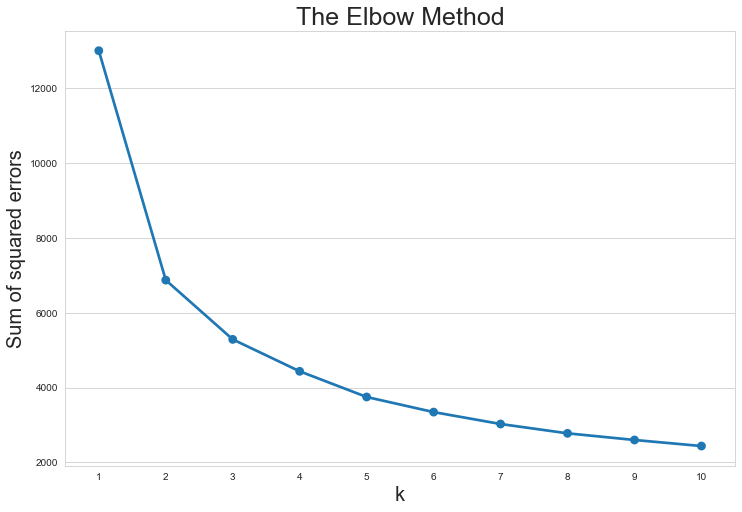

In [61]:
# the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20);
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

<b> Silhouette Analysis </b>

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Calculate Silhouette score
# Initialize the list to store silhouette scores
score = []
# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2, 20))
# Load your data or create your data frame df_clusterScaled
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0) # Initialize KMeans model
    y_preds = kmeans.fit_predict(df_clusterScaled) # Fit the model and get cluster assignments
    score.append(silhouette_score(df_clusterScaled, y_preds)) # Append the silhouette score to the list
    # Now you have a list 'score' containing silhouette scores for different numbers of clusters

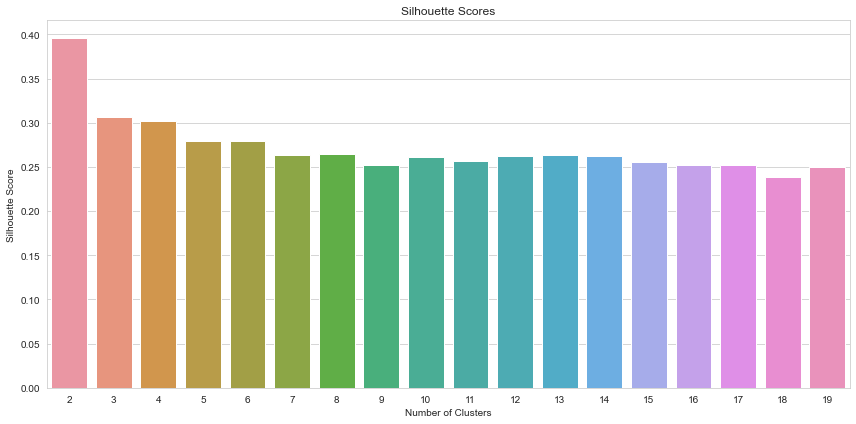

In [64]:
# Silhouette Score v/s Number of Clusters
plt.figure(figsize=(12,6))
sns.barplot(x=n_clusters, y=score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()

<b> Outcomes by Elbow method and Silhoutte score </b>

Based on the results obtained, selecting the highest silhouette score suggests that there could be two distinct clusters. On the other hand, choosing the lowest elbow squared error indicates that there might be around ten clusters.

As a result, in order to determine the most suitable number of clusters based on graphics, it is necessary to carefully consider the outcomes, and it appears that opting for a solution with four different cluster groups could be a balanced approach.
<b> K=4 have optimal score </b>. Let’s visualize these clusters.


In [65]:
clusterer = KMeans(n_clusters=4, random_state=1)
cluster_label = clusterer.fit_predict(df_clusterScaled)

In [66]:
cluster_label

array([3, 0, 0, ..., 2, 3, 0])

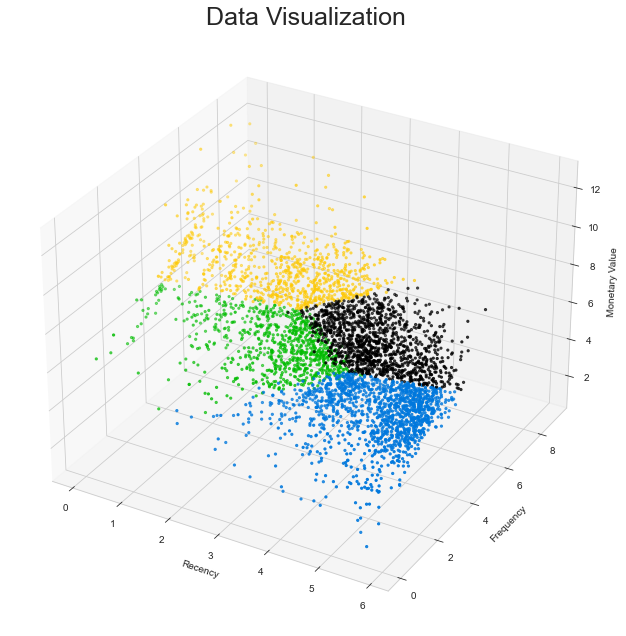

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plot data points in 3D space
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')
x = df_cluster['Log_R']
y = df_cluster['Log_F']
z = df_cluster['Log_M']
colors = cm.nipy_spectral(cluster_label.astype(float) / 4)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title("Data Visualization", size=25)
plt.show()

## Selecting the number of clusters with silhouette analysis on KMeans clustering

We use <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html"> silhouette analysis </a> on KMeans clustering for finding best number of clusters

For n_clusters = 2 The average silhouette_score is : 0.39595612096878746
For n_clusters = 3 The average silhouette_score is : 0.30511846561427997
For n_clusters = 4 The average silhouette_score is : 0.30160383640978417
For n_clusters = 5 The average silhouette_score is : 0.27970076292854673
For n_clusters = 6 The average silhouette_score is : 0.2795799650511975
For n_clusters = 7 The average silhouette_score is : 0.26349207661809515
For n_clusters = 8 The average silhouette_score is : 0.26355886315839905


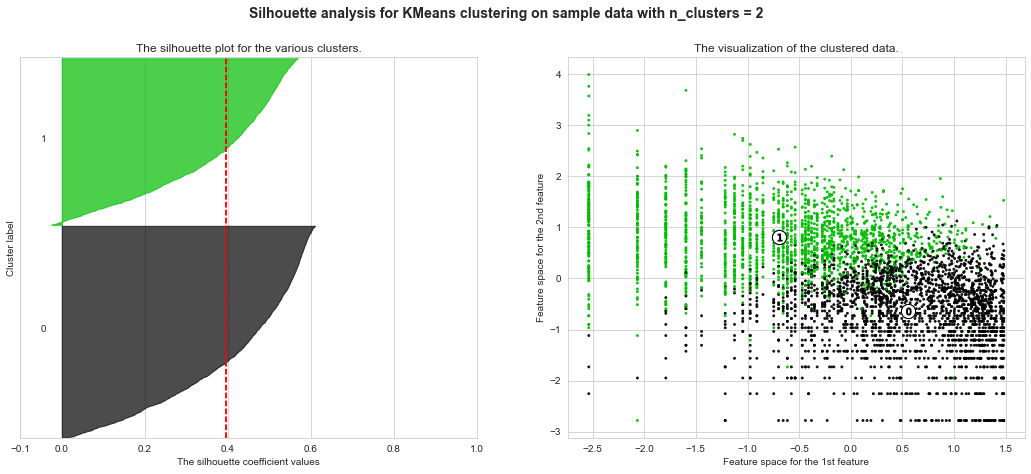

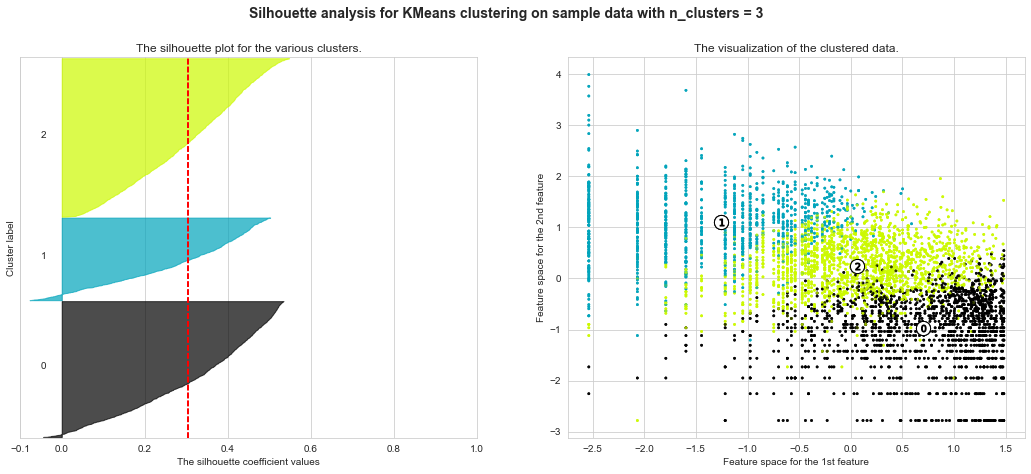

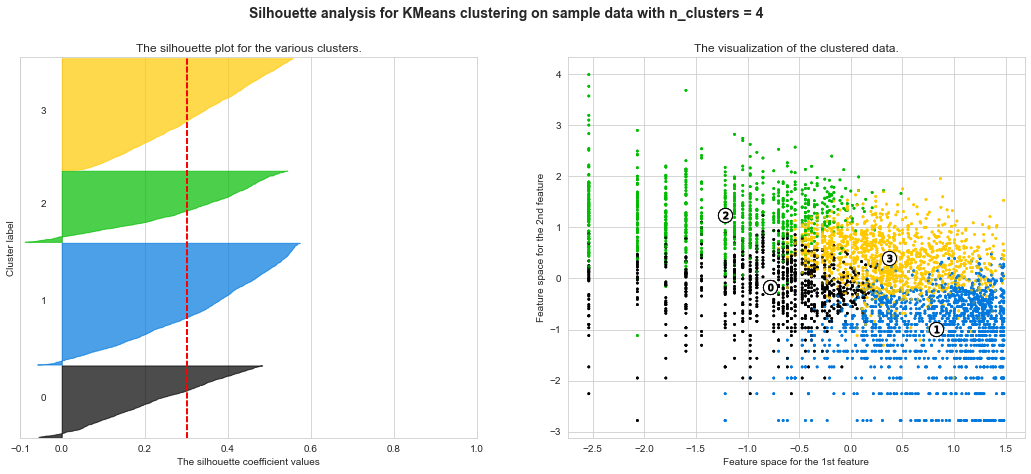

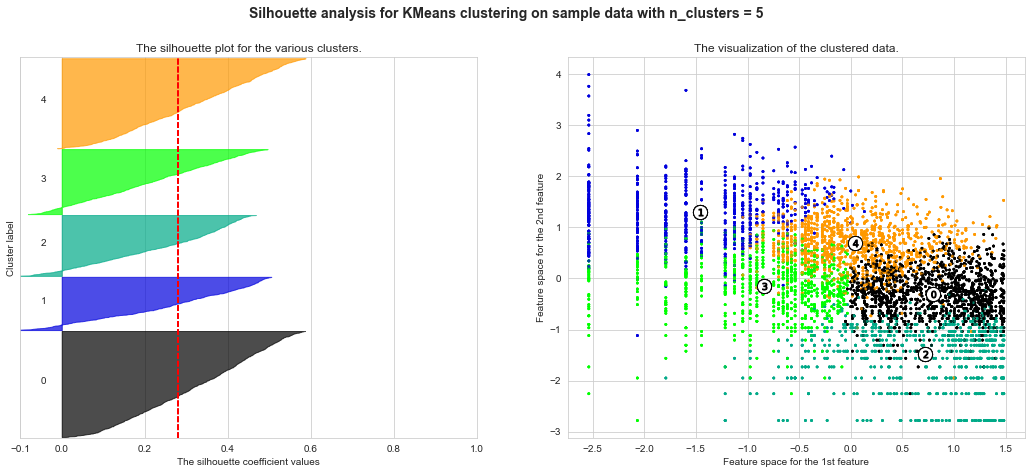

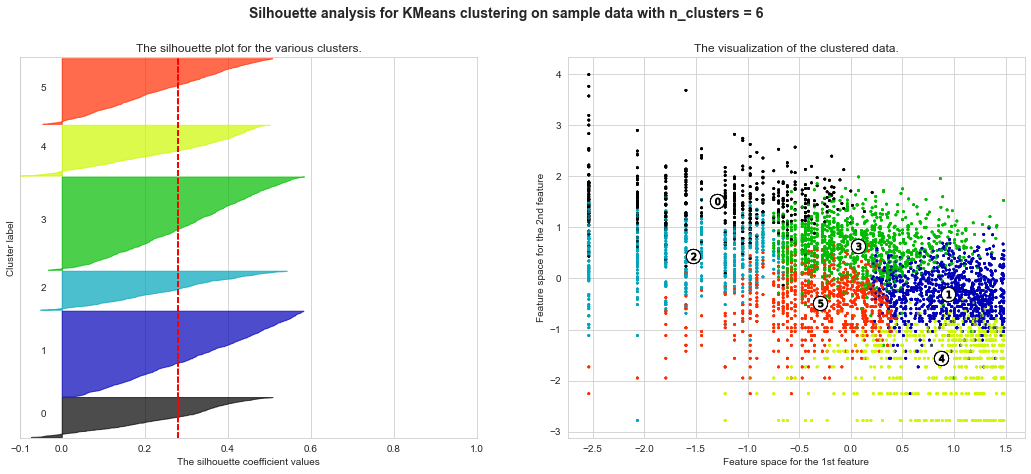

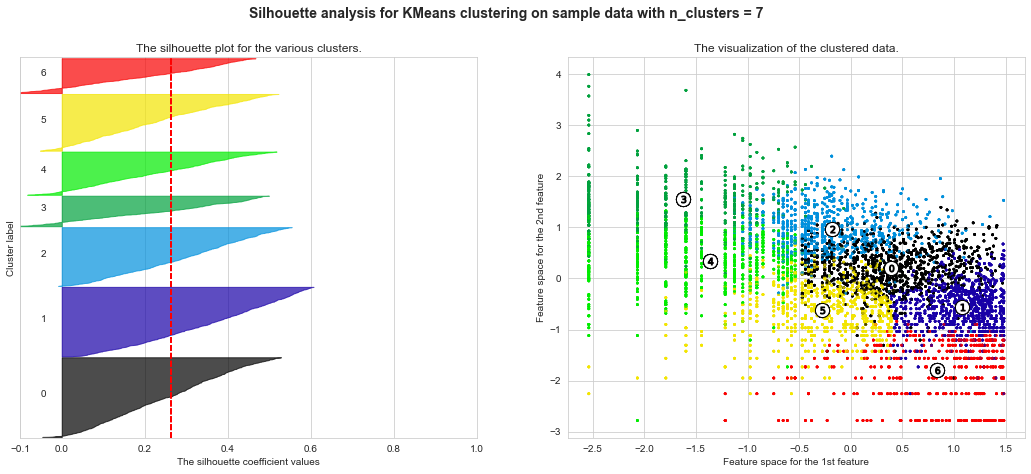

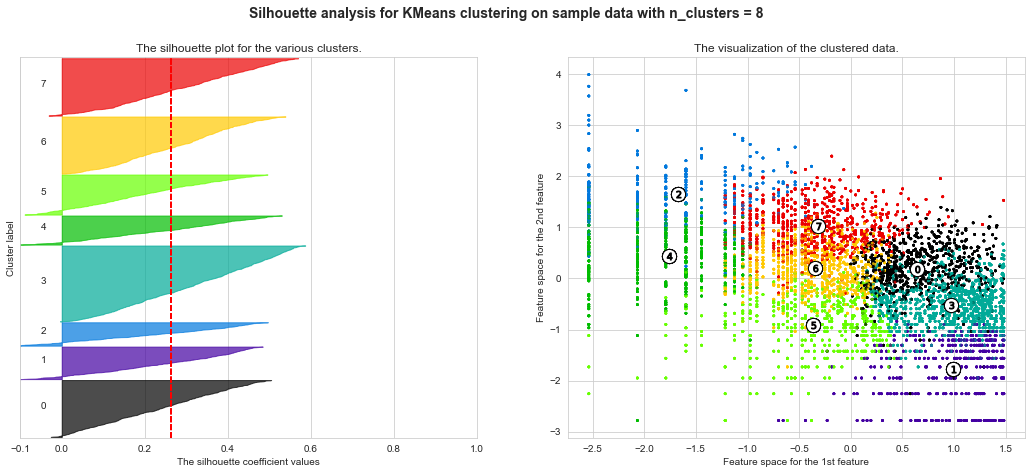

In [68]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig,(ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_clusterScaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_clusterScaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_clusterScaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clusterScaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([]) # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
        ax2.scatter(df_clusterScaled[:, 0], df_clusterScaled[:, 1], marker='.', 
                    s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
        
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")
            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " "with n_clusters = %d" 
                          % n_clusters),fontsize=14, fontweight='bold')
        
plt.show()

In [69]:
#add cluster label as a new column
df_cluster['Cluster']=cluster_label
df_cluster.head(10)

,Log_R,Log_F,Log_M,Cluster
0,0.693,5.204,8.369,3
1,4.317,3.434,7.494,0
2,2.890,4.290,7.472,0
3,5.737,2.833,5.812,1
4,3.584,4.443,7.826,0
5,5.318,1.386,4.489,1
6,5.447,4.060,6.984,0
7,5.366,2.565,6.130,1
8,3.091,4.078,7.941,0
9,3.497,4.875,8.734,3


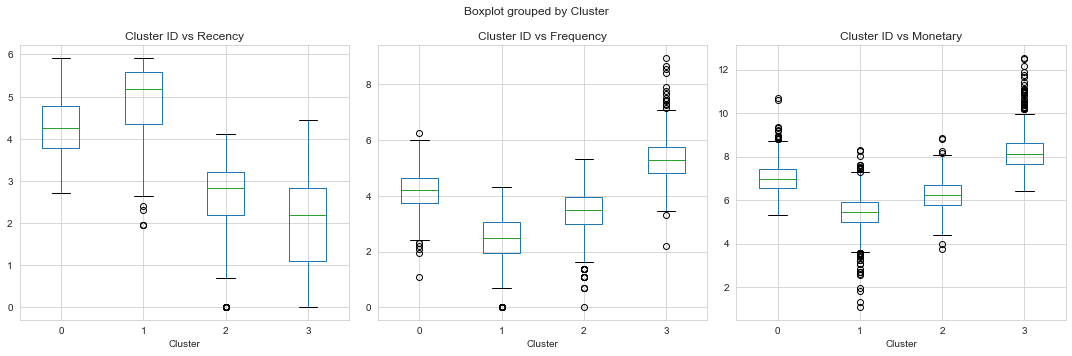

In [70]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for Cluster ID vs Recency
df_cluster.boxplot(column='Log_R', by='Cluster', ax=axes[0])
axes[0].set_title('Cluster ID vs Recency')

# Box plot for Cluster ID vs Frequency
df_cluster.boxplot(column='Log_F', by='Cluster', ax=axes[1])
axes[1].set_title('Cluster ID vs Frequency')

# Box plot for Cluster ID vs Monetary
df_cluster.boxplot(column='Log_M', by='Cluster', ax=axes[2])
axes[2].set_title('Cluster ID vs Monetary')

# Adjust layout
plt.tight_layout()
plt.show()

In [71]:
# calculate mean of each feature for clusters
df_cluster = df_cluster.groupby('Cluster').mean()
df_cluster

,Log_R,Log_F,Log_M
Cluster,,,
0,4.286371,4.192730,7.030444
1,4.959870,2.369111,5.418435
2,2.588274,3.445708,6.208159
3,1.947072,5.309981,8.241612


In [72]:
# We have log-transformed the features now to get more intuition take exponential of each feature
df_cluster = df_cluster.applymap(np.exp)
df_cluster = df_cluster.applymap(int)
df_cluster

,Log_R,Log_F,Log_M
Cluster,,,
0,72,66,1130
1,142,10,225
2,13,31,496
3,7,202,3795


<table id="table" style="border-color: #827d7d;" border="2" cellspacing="2" cellpadding="2">
<tbody>
<tr>
<td style="border-color: #827d7d; width: 10%;  background-color: #11a4e7;"><strong><span style="color: #ffffff;">Cluster Number</span></strong></td>
<td style="border-color: #827d7d; width: 45%;  background-color: #11a4e7;"><strong><span style="color: #ffffff;">RFM Decoding Customer
Value</span></strong></td>
<td style="border-color: #827d7d; width: 40%; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Type of Customer</span></strong></td>
</tr>

<tr>
<td>0</td>
<td><span style="font-weight: 400;">Bought most recently and most often, and spend the most</span></td>
<td><span style="font-weight: 400;">Best Customers</span></td>
</tr>

<tr>
<td>1</td>
<td><span style="font-weight: 400;">Bought most recently and most often, and spend the most</span></td>
<td><span style="font-weight: 400;"> Risky Customers </span></td>
</tr>

<tr>
<td>2</td>
<td>Last bought while ago and less frequent and spend the most</td>
<td>Churned Customers</td>
</tr>

<tr>
<td>3</td>
<td><span style="font-weight: 400;">Bought most recently but low frequency and monetary</span></td>
<td><span style="font-weight: 400;">New Customers</span></td>
</tr>
</tbody>
</table>

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering

DBSCAN Clustering Algorithm K-Means and Hierarchical Clustering struggle with creating clusters of complex shapes and adapting to varying densities. In contrast, DBSCAN excels by grouping densely packed data points into clusters and effectively identifying clusters in large spatial datasets based on local density. The most exciting feature of DBSCAN clustering is that it is robust to outliers.

In [73]:
df_clusterScaled

array([[-2.06658152e+00,  1.16054770e+00,  1.41835454e+00],
       [ 3.93073233e-01, -1.80688607e-01,  7.23820703e-01],
       [-5.75449762e-01,  4.67954489e-01,  7.06358138e-01],
       ...,
       [-1.21615453e+00, -8.99803441e-01, -1.11133613e+00],
       [-1.79102417e+00,  2.20398408e+00,  8.26214834e-01],
       [ 9.85909588e-05,  4.36128543e-01,  7.41283268e-01]])

-1     124
 0    4169
 1      44
Name: DBSCAN_Cluster, dtype: int64


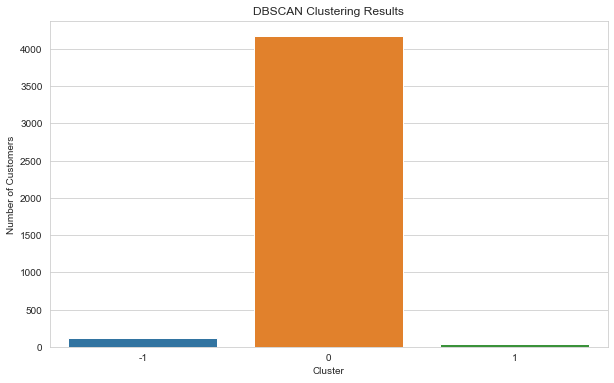

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select features for DBSCAN
#df_dbscan = df_rfm[['Log_R', 'Log_F', 'Log_M']]
# Standardize the features
#scaler = StandardScaler()
#df_dbscan_scaled = scaler.fit_transform(df_dbscan)
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=9) # Adjust eps and min_samples based on your data

# Fit and predict clusters
cluster_labels = dbscan.fit_predict(df_clusterScaled)

# Add cluster labels to the original dataset
df_rfm['DBSCAN_Cluster'] = cluster_labels

# Count the number of customers in each cluster
cluster_counts = df_rfm['DBSCAN_Cluster'].value_counts().sort_index()

# Display cluster counts
print(cluster_counts)

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('DBSCAN Clustering Results')
plt.show()

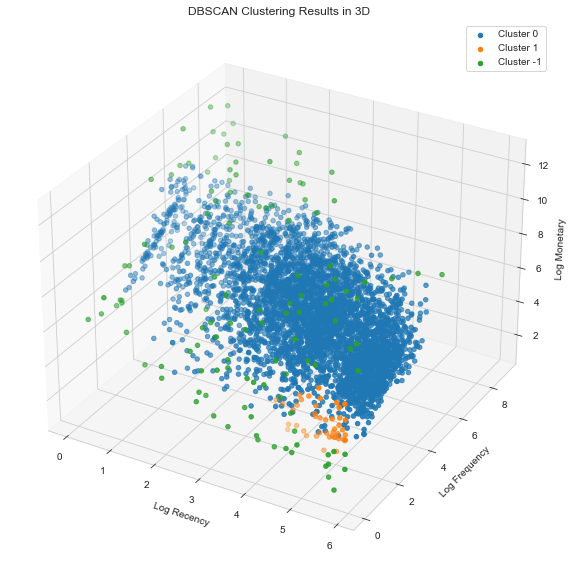

In [75]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Extract cluster labels and corresponding data
cluster_labels = df_rfm['DBSCAN_Cluster']
x = df_rfm['Log_R']
y = df_rfm['Log_F']
z = df_rfm['Log_M']

# Create a scatter plot for each cluster
for cluster_id in set(cluster_labels):
    cluster_mask = (cluster_labels == cluster_id)
    ax.scatter(x[cluster_mask], y[cluster_mask], z[cluster_mask], label=f'Cluster {cluster_id}')

# Set labels and title
ax.set_xlabel('Log Recency')
ax.set_ylabel('Log Frequency')
ax.set_zlabel('Log Monetary')
ax.set_title('DBSCAN Clustering Results in 3D')
ax.legend()
plt.show()

In [76]:
df_rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM,Log_R,Log_F,Log_M,DBSCAN_Cluster
CustomerID,,,,,,,,,,,,
12347.0,2,182,4310.00,4,1,1,6,411,0.693,5.204,8.369,0
12348.0,75,31,1797.24,2,3,1,6,231,4.317,3.434,7.494,0
12349.0,18,73,1757.55,3,2,1,6,321,2.890,4.290,7.472,0
12350.0,310,17,334.40,1,4,3,8,143,5.737,2.833,5.812,0
12352.0,36,85,2506.04,3,2,1,6,321,3.584,4.443,7.826,0


In [77]:
# Calculate the mean of each feature for clusters
cluster_means = df_rfm.groupby('DBSCAN_Cluster')[['Recency', 'Frequency','Monetary']].mean()

# Print the cluster means
print(cluster_means)

                   Recency   Frequency      Monetary
DBSCAN_Cluster                                      
-1               61.645161  396.040323  21853.746774
 0               91.347325   82.412089   1420.666600
 1              245.386364    1.000000    203.000909


In [78]:
# Take exponential of log-transformed features
cluster_means_original_scale = cluster_means.applymap(np.exp)
cluster_means_original_scale=cluster_means.applymap(int)

# Print the cluster means in the original scale
print(cluster_means_original_scale)
print('\ncluster_counts')
print(cluster_counts)

                Recency  Frequency  Monetary
DBSCAN_Cluster                              
-1                   61        396     21853
 0                   91         82      1420
 1                  245          1       203

cluster_counts
-1     124
 0    4169
 1      44
Name: DBSCAN_Cluster, dtype: int64


<table id="table" style="border-color: #827d7d;" border="2" cellspacing="2" cellpadding="2">
<tbody>
<tr>
<td style="border-color: #827d7d; width: 10%;  background-color: #11a4e7;"><strong><span style="color: #ffffff;">Cluster Number</span></strong></td>
<td style="border-color: #827d7d; width: 45%;  background-color: #11a4e7;"><strong><span style="color: #ffffff;">RFM Decoding Customer
Value</span></strong></td>
<td style="border-color: #827d7d; width: 40%; background-color: #11a4e7;"><strong><span style="color: #ffffff;">Type of Customer</span></strong></td>
</tr>

<tr>
<td>-1</td>
<td><span style="font-weight: 400;">Bought most recently and most often, and spend the most</span></td>
<td><span style="font-weight: 400;">Best Customers</span></td>
</tr>

<tr>
<td>0</td>
<td><span style="font-weight: 400;">Last bought while ago and less frequent and spend the most </span></td>
<td><span style="font-weight: 400;"> Risky Customers </span></td>
</tr>

<tr>
<td>1</td>
<td>Bought long time ago and least frequency and monetary </td>
<td>Churned Customers</td>
</tr>

</tbody>
</table>